In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
sys.path.append(os.pardir)

In [2]:
from torch.utils.data import DataLoader ,TensorDataset, Dataset

In [3]:
path_train = os.path.join('..', 'train.csv')
path_test = os.path.join('..', 'test.csv')

In [4]:
train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)

In [104]:
# class PredDataset(Dataset):
#     def __init__(self, path, x_desc=[]):
#         super().__init__()
        
#         self.x_desc = x_desc
        
#         # CSVファイル読み込み（訓練データ）
#         self.df = pd.read_csv(path)
        
#         # 性別を変換する
#         colval=['female','male']
#         ## 初期値０の列を作成する
#         for col in colval:
#             self.df[col]=0
#         ## 性別のカテゴリ毎に値編集
#         for col in colval:
#             self.df.loc[self.df['Sex']==col, col]=1

#     def describe(self):
#         return self.df.describe()
    
#     def MaxScale(self):

#         col='Fare'
#         maxval=self.x_desc.loc['std',col]
#         self.df.loc[self.df[col]>maxval , col]=maxval
        
#         col='Parch'
#         maxval=self.x_desc.loc['std',col]
#         self.df.loc[self.df[col]>maxval , col]=maxval

    
#     def NpToPy(self):
#         # 目的変数の格納
#         self.df_x  = self.df.copy()
#         self.x_desc = x_desc
    
#     def __getitem__(self, index):
#         return self.X_train[index], self.Y_train[index]
    
#     def __len__(self):
#         return self.num


In [105]:
# class TrainDataset(PredDataset):
#     def __init__(self, path, x_desc=[]):
#         super().__init__(path, x_desc)
        
#         self.x_desc = self.describe()
        

#     def boxPlot(self):
        
#         df_sns = self.df.copy()
# #         if len(y) == 1:
# #             df_sns['Survived'] = '0'
# #         else:
# #             df_sns['Survived'] = y
        
#         fig, ax = plt.subplots(3,3,figsize=(20,15))
#         sns.boxplot(x="Survived",y="Pclass",data=df_sns,ax=ax[0][0])
#         sns.boxplot(x="Survived",y="Age",data=df_sns,ax=ax[0][1])
#         sns.boxplot(x="Survived",y="SibSp",data=df_sns,ax=ax[0][2])
#         sns.boxplot(x="Survived",y="Parch",data=df_sns,ax=ax[1][0])
#         sns.boxplot(x="Survived",y="Fare",data=df_sns,ax=ax[1][1])
#         sns.boxplot(x="Survived",y="male",data=df_sns,ax=ax[1][2])
#         sns.boxplot(x="Survived",y="female",data=df_sns,ax=ax[2][0])
#         plt.tight_layout()
    
#     def histPlot(self):
#         cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
#         n_x_cont = self.df[cols].loc[self.df['Survived']==0,:].copy()
#         d_x_cont = self.df[cols].loc[self.df['Survived']==1,:].copy()

#         col_val=3
#         row_val=len(cols)
        

#         i = 0
#         plt.figure(figsize=(15,30))
#         for col in n_x_cont.columns.values:
#             plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
#             plt.hist([self.df.loc[:, col]])
#             plt.grid(which='major',color='black',linestyle='-')
#             if (i + 1) == 1:
#                 plt.title('All')
#             plt.ylabel(col)
#             i += 1
#             plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
#             plt.hist([n_x_cont.loc[:, col]])
#             plt.grid(which='major',color='black',linestyle='-')
#             if (i + 1) == 2:
#                 plt.title('None')
#             i += 1
#             plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
#             plt.hist([d_x_cont.loc[:, col]])
#             plt.grid(which='major',color='black',linestyle='-')
#             if (i + 1) == 3:
#                 plt.title('Survived')
#             i += 1

#         plt.show()

    
#     def NpToPy(self):
#         # 目的変数の格納
#         self.df_x = df.drop(['Survived'], axis=1)
#         # 説明変数の格納
#         self.df_y = df.loc[:,['Survived']]
        
        

In [106]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [108]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
train_df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [110]:
d_train_df = train_df.loc[train_df['Survived']==0,:].copy()
s_train_df = train_df.loc[train_df['Survived']==1,:].copy()

# Pclass (チケットクラス)
1 = 上層クラス（お金持ち） \
2 = 中級クラス（一般階級） \
3 = 下層クラス（労働階級）

In [111]:
col='Pclass'
pd.concat([train_df[col], d_train_df[col], s_train_df[col]], axis=1).describe()

,Pclass,Pclass,Pclass
count,891.000000,549.000000,342.000000
mean,2.308642,2.531876,1.950292
std,0.836071,0.735805,0.863321
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000
75%,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000


In [112]:
train_df.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

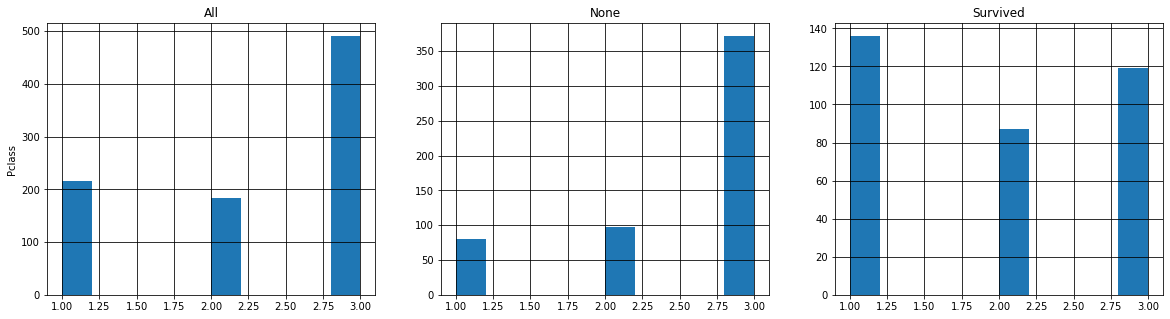

In [113]:
col = ['Pclass']
d_x_cont = train_df[col].loc[train_df['Survived']==0,:].copy()
s_x_cont = train_df[col].loc[train_df['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1)  
plt.hist([s_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

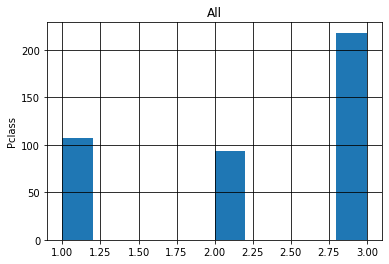

In [114]:
col = ['Pclass']

col_val=1
row_val=1


i = 0
col = col[0]

plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
plt.hist([test_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)

plt.show()

In [115]:
train_df_Pclass = train_df.copy()
train_df_Pclass.loc[train_df_Pclass['Pclass']==2,'Pclass'] = 1
train_df_Pclass.loc[train_df_Pclass['Pclass']==3,'Pclass'] = 0

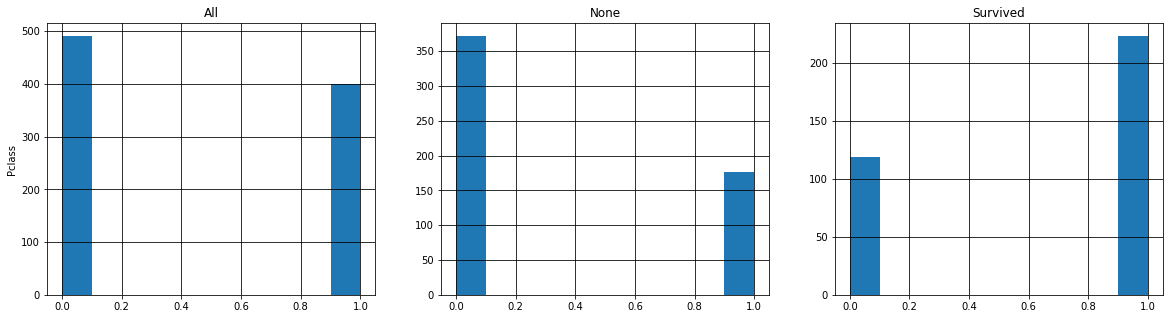

In [116]:
col = ['Pclass']
d_x_cont = train_df_Pclass[col].loc[train_df_Pclass['Survived']==0,:].copy()
s_x_cont = train_df_Pclass[col].loc[train_df_Pclass['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df_Pclass.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1)  
plt.hist([s_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

# Age

In [117]:
train_df.groupby(['Age','Survived']).count()

,,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,Survived,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,1,0,1
0.75,1,2,2,2,2,2,2,2,2,0,2
0.83,1,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
70.00,0,2,2,2,2,2,2,2,2,1,2
70.50,0,1,1,1,1,1,1,1,1,0,1
71.00,0,2,2,2,2,2,2,2,2,1,2


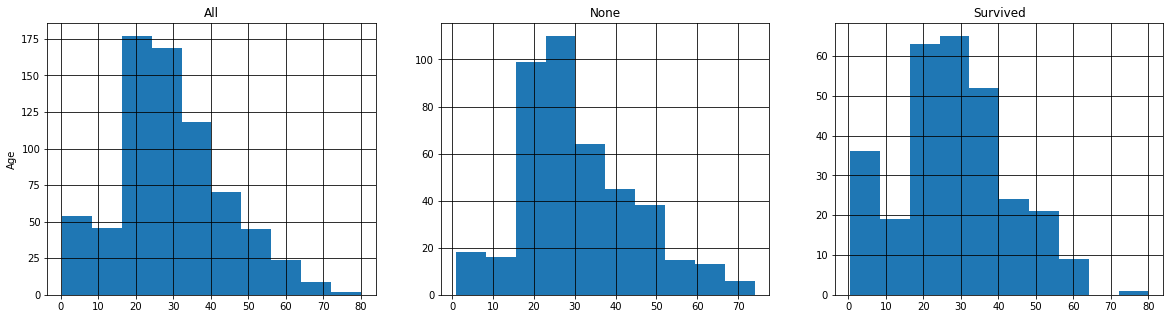

In [118]:
col = ['Age']
n_x_cont = train_df[col].loc[train_df['Survived']==0,:].copy()
d_x_cont = train_df[col].loc[train_df['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([n_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

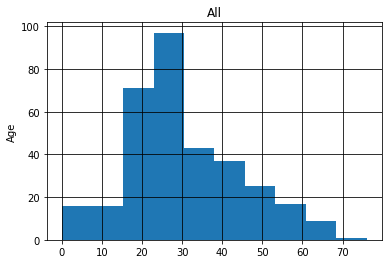

In [119]:
col = ['Age']

col_val=1
row_val=1


i = 0
col = col[0]

plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
plt.hist([test_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)

plt.show()

## 年齢の区切り

In [120]:
bins = [0, 18, 30, 45, 60, 70, 100]
col = 'Age'
train_df_age = train_df.copy()
train_df_age[col] = pd.cut(train_df[col], bins=bins, labels=False)

In [121]:
train_df_age.groupby([col,'Survived']).count()

PassengerId  Pclass  Name  Sex  SibSp  Parch  Ticket  Fare  \
Age Survived                                                               
0.0 0                  69      69    69   69     69     69      69    69   
    1                  70      70    70   70     70     70      70    70   
1.0 0                 174     174   174  174    174    174     174   174   
    1                  96      96    96   96     96     96      96    96   
2.0 0                 116     116   116  116    116    116     116   116   
    1                  86      86    86   86     86     86      86    86   
3.0 0                  48      48    48   48     48     48      48    48   
    1                  33      33    33   33     33     33      33    33   
4.0 0                  13      13    13   13     13     13      13    13   
    1                   4       4     4    4      4      4       4     4   
5.0 0                   4       4     4    4      4      4       4     4   
    1                   1       1     1    1      1      1       1     1   

              Cabin  Embarked  
Age Survived                   
0.0 0             3        69  
    1            20        70  
1.0 0            13       174  
    1            33        96  
2.0 0            17       116  
    1            44        85  
3.0 0            19        48  
    1            25        33  
4.0 0             7        13  
    1             2         3  
5.0 0             1         4  
    1             1         1

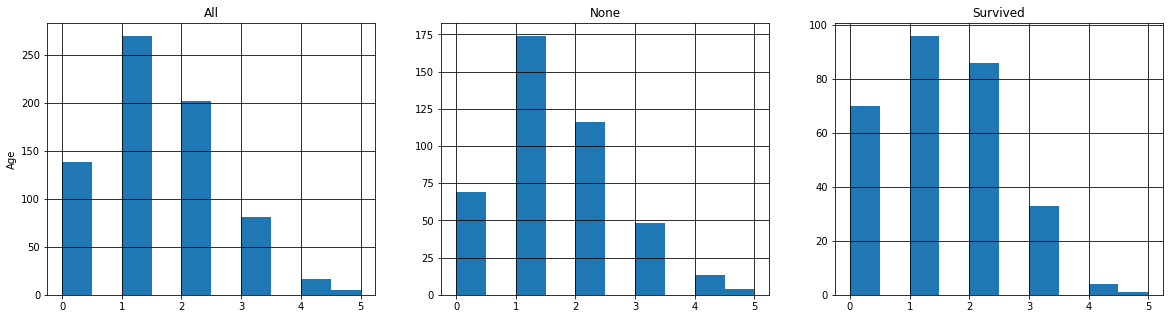

In [122]:
col = ['Age']
n_x_cont = train_df_age[col].loc[train_df_age['Survived']==0,:].copy()
d_x_cont = train_df_age[col].loc[train_df_age['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1)  
plt.hist([train_df_age.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1) 
plt.hist([n_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1)  
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

# Fareの区切り

In [53]:
train_Fare_df = train_df.copy()

fare=train_Fare_df.loc[(train_Fare_df['Embarked'] == 'S') & (train_Fare_df['Pclass'] == 3), 'Fare'].median()
train_Fare_df['Fare']=train_Fare_df['Fare'].fillna(fare)


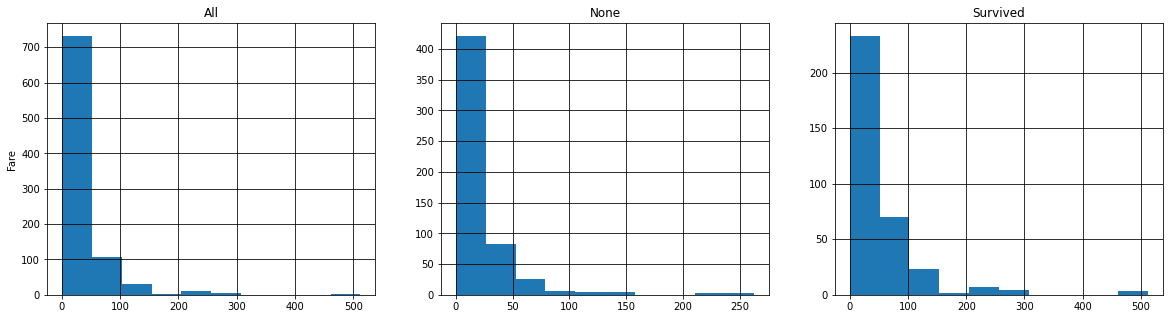

In [54]:
col = ['Fare']
n_x_cont = train_Fare_df[col].loc[train_Fare_df['Survived']==0,:].copy()
d_x_cont = train_Fare_df[col].loc[train_Fare_df['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_Fare_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([n_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

In [57]:
bins = [0, 20, 50, 70, 100, 1000]
col = 'Fare'
train_Fare_df[col] = pd.cut(train_Fare_df[col], bins=bins, labels=False)

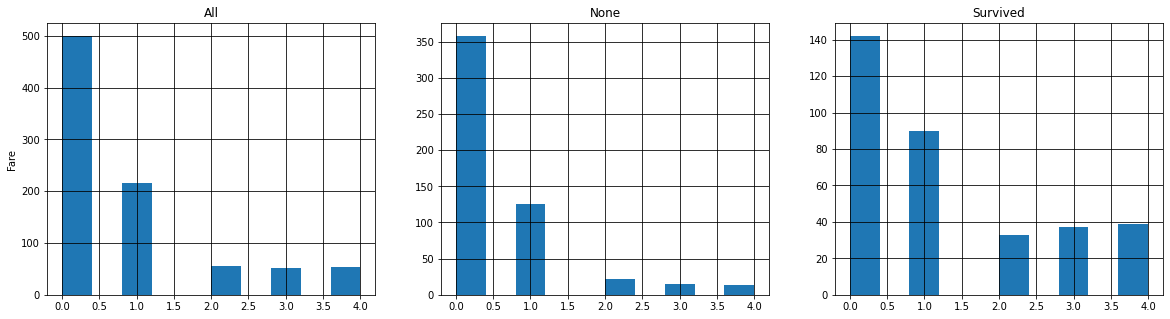

In [56]:
col = ['Fare']
n_x_cont = train_Fare_df[col].loc[train_Fare_df['Survived']==0,:].copy()
d_x_cont = train_Fare_df[col].loc[train_Fare_df['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_Fare_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([n_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

# Parch

In [23]:
train_df.groupby(['Parch','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Ticket  Fare  \
Parch Survived                                                             
0     0                 445     445   445  445  335    445     445   445   
      1                 233     233   233  233  186    233     233   233   
1     0                  53      53    53   53   49     53      53    53   
      1                  65      65    65   65   61     65      65    65   
2     0                  40      40    40   40   29     40      40    40   
      1                  40      40    40   40   39     40      40    40   
3     0                   2       2     2    2    2      2       2     2   
      1                   3       3     3    3    3      3       3     3   
4     0                   4       4     4    4    4      4       4     4   
5     0                   4       4     4    4    4      4       4     4   
      1                   1       1     1    1    1      1       1     1   
6     0                   1       1     1    1    1      1       1     1   

                Cabin  Embarked  
Parch Survived                   
0     0            50       445  
      1            91       231  
1     0            11        53  
      1            28        65  
2     0             6        40  
      1            17        40  
3     0             0         2  
      1             0         3  
4     0             1         4  
5     0             0         4  
      1             0         1  
6     0             0         1

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

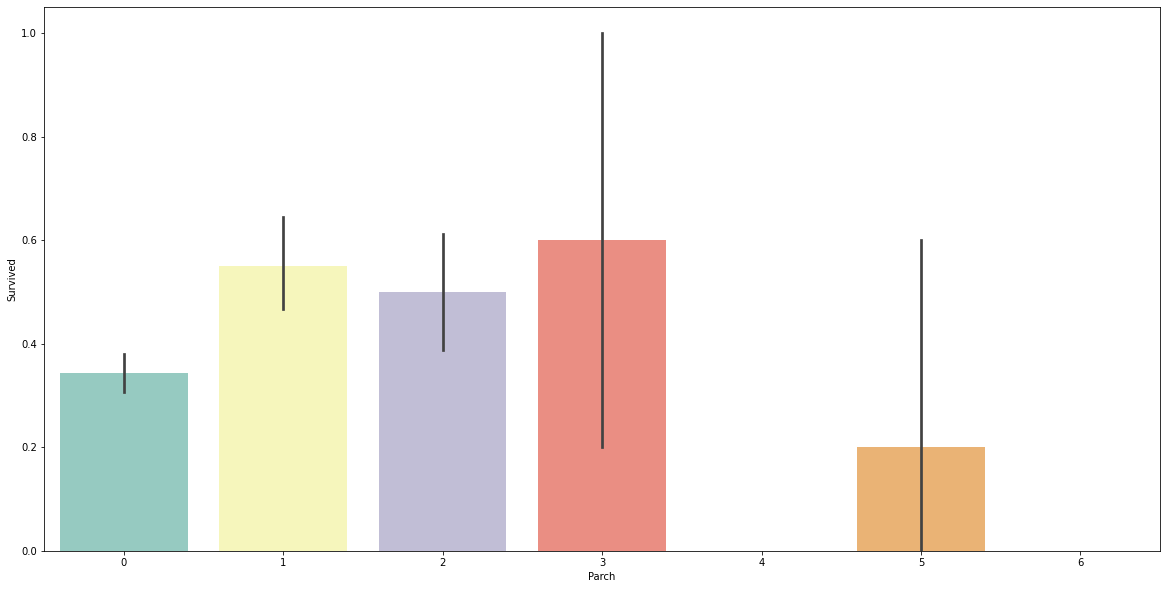

In [26]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Parch', y='Survived', data=train_df, palette='Set3')

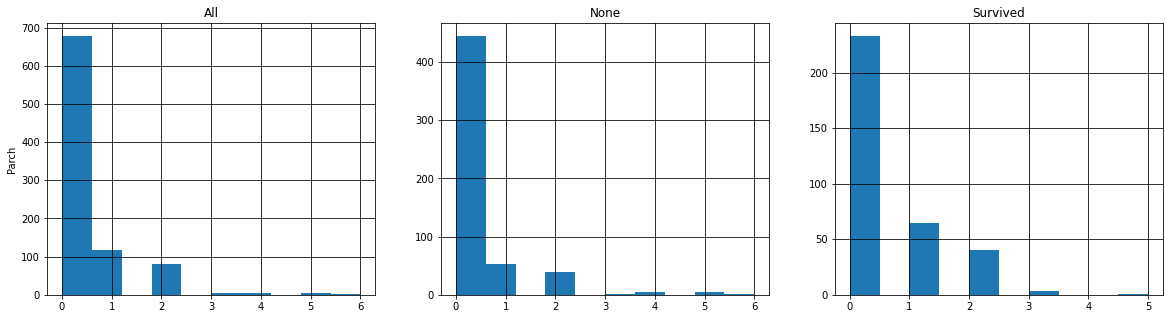

In [24]:
col = ['Parch']
n_x_cont = train_df[col].loc[train_df['Survived']==0,:].copy()
d_x_cont = train_df[col].loc[train_df['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([n_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

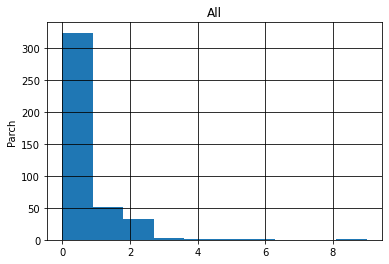

In [25]:
col = ['Parch']

col_val=1
row_val=1


i = 0
col = col[0]

plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
plt.hist([test_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)

plt.show()

## 1以上は「タイタニックに同乗している親/子供の数」がいることを示しているため、兄弟/配偶者の数がいる・いないの２択に変更する

In [90]:
train_df_Parch = train_df.copy()
train_df_Parch.loc[train_df_Parch['Parch']>1,'Parch'] = 1

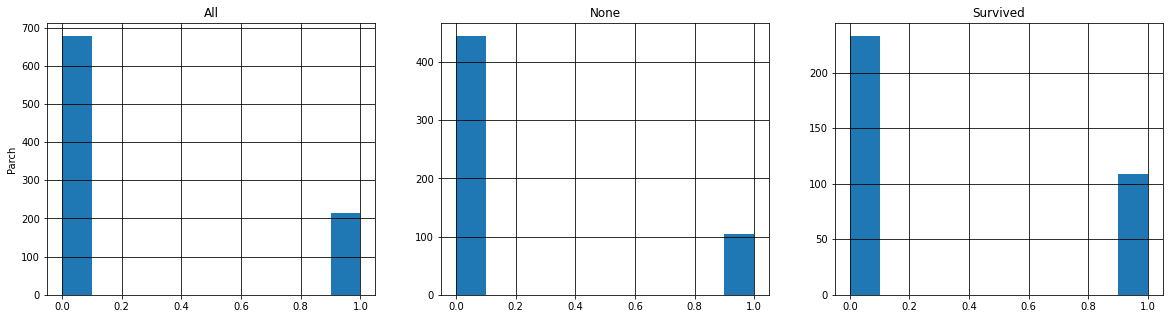

In [91]:
col = ['Parch']
n_x_cont = train_df_Parch[col].loc[train_df_Parch['Survived']==0,:].copy()
d_x_cont = train_df_Parch[col].loc[train_df_Parch['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df_Parch.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([n_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

# SibSp

In [92]:
train_df.groupby(['SibSp','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  Parch  Ticket  Fare  \
SibSp Survived                                                             
0     0                 398     398   398  398  296    398     398   398   
      1                 210     210   210  210  175    210     210   210   
1     0                  97      97    97   97   86     97      97    97   
      1                 112     112   112  112   97    112     112   112   
2     0                  15      15    15   15   14     15      15    15   
      1                  13      13    13   13   11     13      13    13   
3     0                  12      12    12   12    8     12      12    12   
      1                   4       4     4    4    4      4       4     4   
4     0                  15      15    15   15   15     15      15    15   
      1                   3       3     3    3    3      3       3     3   
5     0                   5       5     5    5    5      5       5     5   
8     0                   7       7     7    7    0      7       7     7   

                Cabin  Embarked  
SibSp Survived                   
0     0            49       398  
      1            77       208  
1     0            17        97  
      1            52       112  
2     0             1        15  
      1             5        13  
3     0             1        12  
      1             2         4  
4     0             0        15  
      1             0         3  
5     0             0         5  
8     0             0         7

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

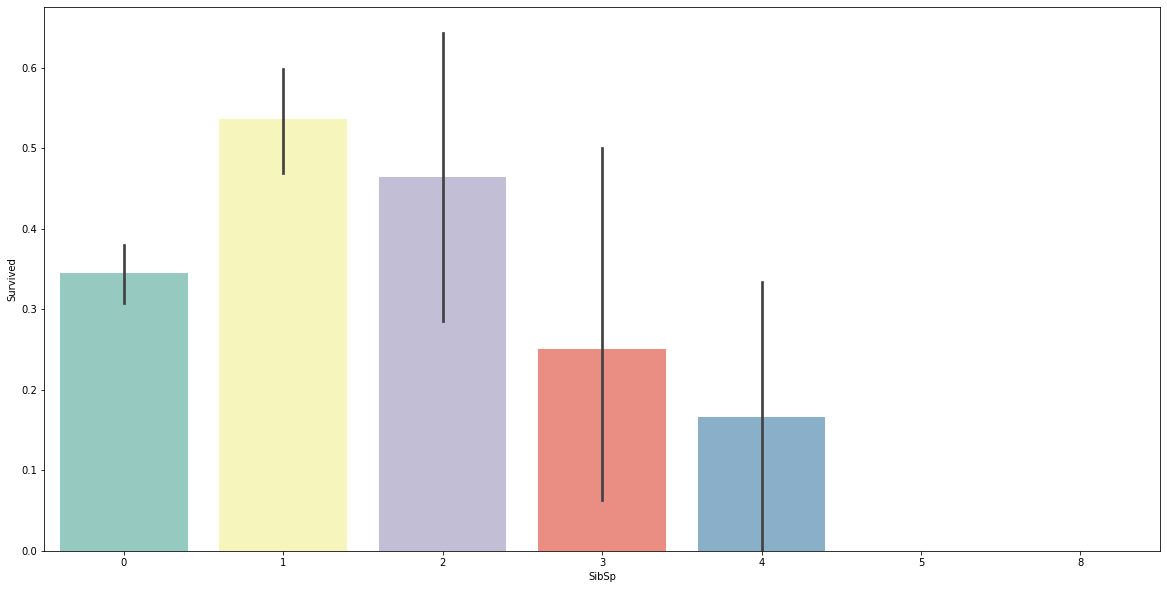

In [27]:
plt.figure(figsize=(20, 10))
sns.barplot(x='SibSp', y='Survived', data=train_df, palette='Set3')

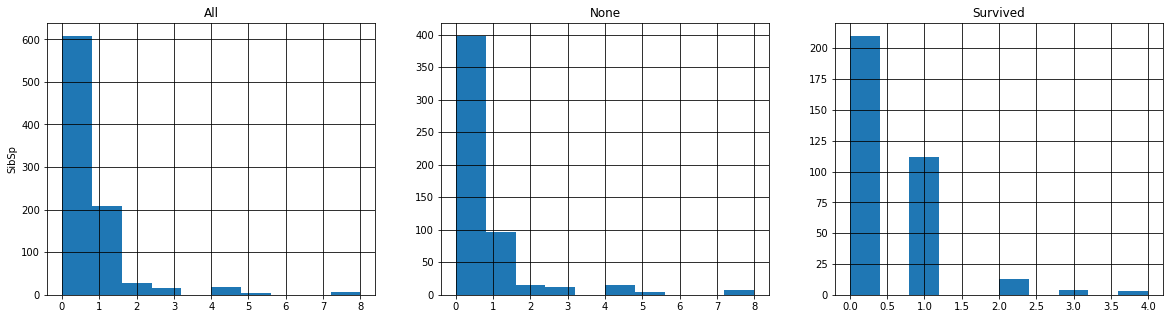

In [93]:
col = ['SibSp']
n_x_cont = train_df[col].loc[train_df['Survived']==0,:].copy()
d_x_cont = train_df[col].loc[train_df['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([n_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

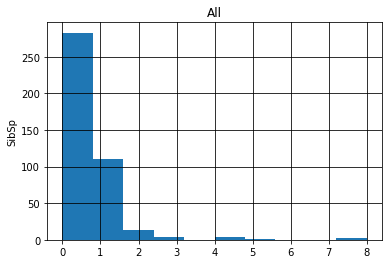

In [94]:
col = ['SibSp']

col_val=1
row_val=1


i = 0
col = col[0]

plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
plt.hist([test_df.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)

plt.show()

## 1以上は「タイタニックに同乗している兄弟/配偶者の数」がいることを示しているため、兄弟/配偶者の数がいる・いないの２択に変更する

In [95]:
train_df_SibSp = train_df.copy()
train_df_SibSp.loc[train_df_SibSp['SibSp']>1,'SibSp'] = 1

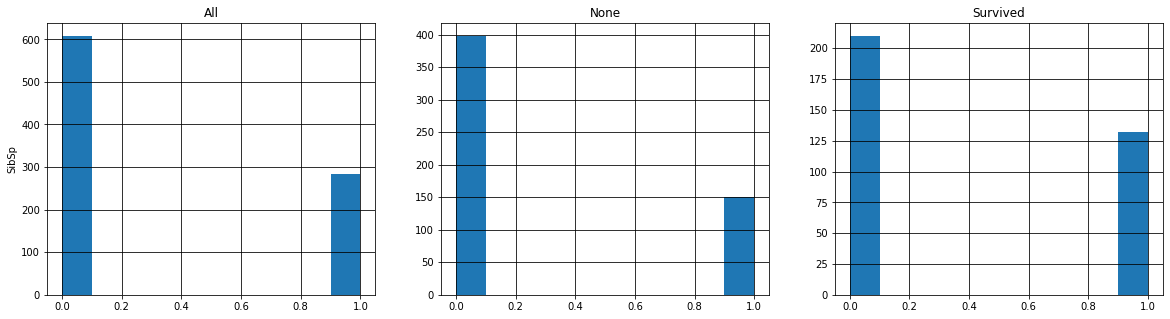

In [96]:
col = ['SibSp']
n_x_cont = train_df_SibSp[col].loc[train_df_SibSp['Survived']==0,:].copy()
d_x_cont = train_df_SibSp[col].loc[train_df_SibSp['Survived']==1,:].copy()

col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df_SibSp.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([n_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

# Family

In [20]:
train_family_df = train_df.copy()

In [21]:
# ----------- Family -------------
# Family = SibSp + Parch + 1 を特徴量とし、グルーピング
train_family_df['Family']=train_family_df['SibSp']+train_family_df['Parch']+1
train_family_df.loc[(train_family_df['Family']>=2) & (train_family_df['Family']<=4), 'Family_label'] = 2
train_family_df.loc[(train_family_df['Family']>=5) & (train_family_df['Family']<=7) | (train_family_df['Family']==1), 'Family_label'] = 1  # == に注意
train_family_df.loc[(train_family_df['Family']>=8), 'Family_label'] = 0

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

sns.heatmap(train_family_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:xlabel='Family_label', ylabel='Survived'>

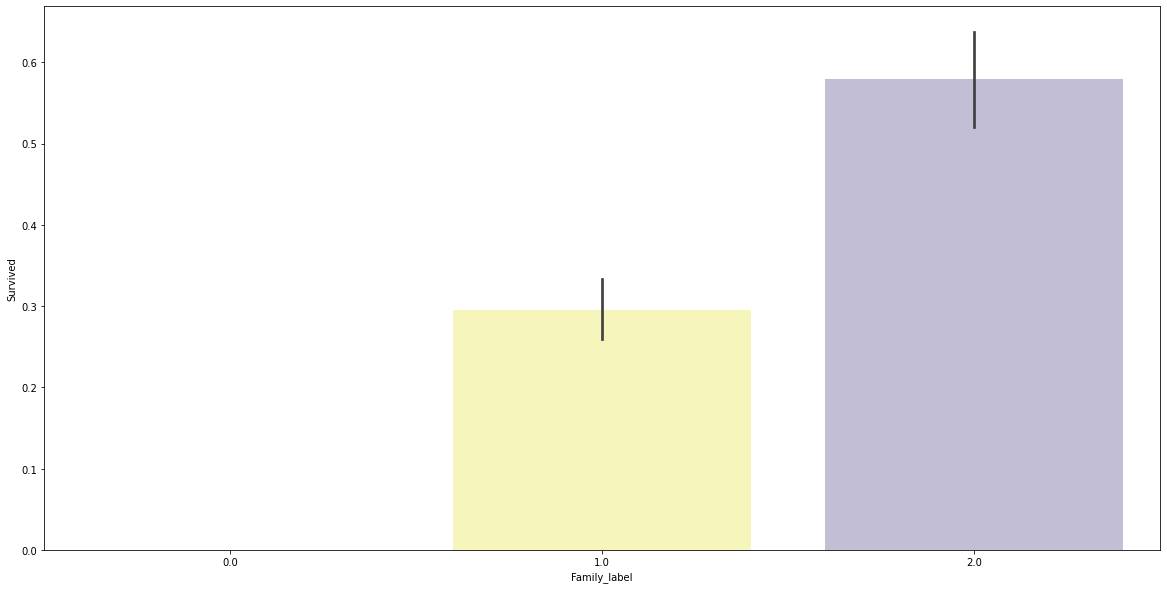

In [22]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Family_label', y='Survived', data=train_family_df, palette='Set3')

# Embarked 

In [97]:
train_df.groupby(['Embarked','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked Survived                                                              
C        0                  75      75    75   75   51     75     75      75   
         1                  93      93    93   93   79     93     93      93   
Q        0                  47      47    47   47   20     47     47      47   
         1                  30      30    30   30    8     30     30      30   
S        0                 427     427   427  427  353    427    427     427   
         1                 217     217   217  217  201    217    217     217   

                   Fare  Cabin  
Embarked Survived               
C        0           75     17  
         1           93     52  
Q        0           47      2  
         1           30      2  
S        0          427     49  
         1          217     80

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\takas\anaconda3\envs\ml\lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


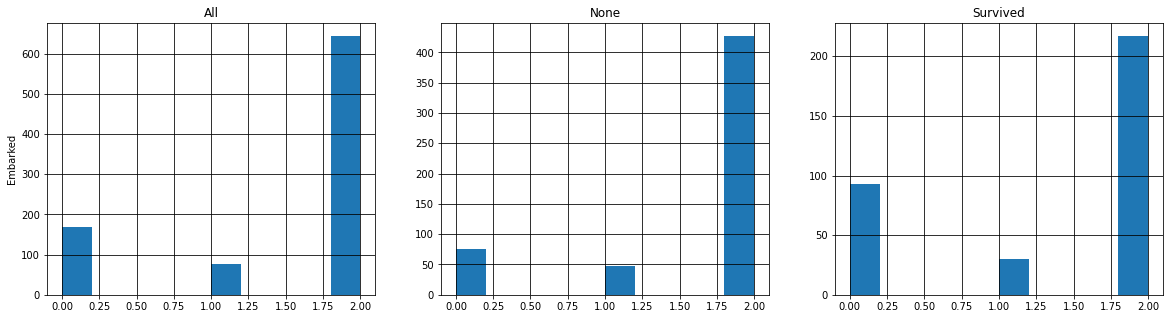

In [99]:
col = ['Embarked']

train_df_Embarked = train_df.copy()
train_df_Embarked.loc[train_df_Embarked['Embarked']=='C','Embarked'] = 0
train_df_Embarked.loc[train_df_Embarked['Embarked']=='Q','Embarked'] = 1
train_df_Embarked.loc[train_df_Embarked['Embarked']=='S','Embarked'] = 2
d_x_cont = train_df_Embarked[col].loc[train_df_Embarked['Survived']==0,:].copy()
s_x_cont = train_df_Embarked[col].loc[train_df_Embarked['Survived']==1,:].copy()



col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df_Embarked.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([s_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()

# Embarked（出港した場所） ＋ Pclass (チケットクラス)
## 生存確率が高いはず

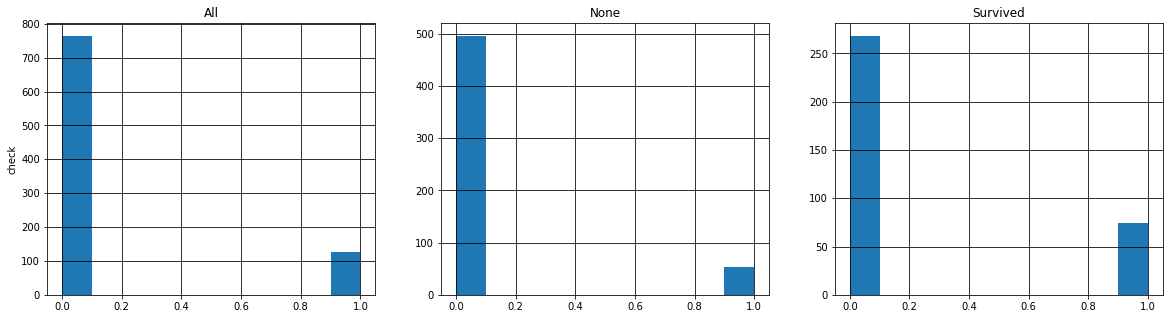

In [12]:
col = ['check']

train_df_Embarked_Pclass = train_df.copy()
train_df_Embarked_Pclass['check'] = 0
train_df_Embarked_Pclass.loc[(train_df_Embarked_Pclass['Embarked']=='S') & (train_df_Embarked_Pclass['Pclass']==1),'check'] = 1

d_x_cont = train_df_Embarked_Pclass[col].loc[train_df_Embarked_Pclass['Survived']==0,:].copy()
s_x_cont = train_df_Embarked_Pclass[col].loc[train_df_Embarked_Pclass['Survived']==1,:].copy()



col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df_Embarked_Pclass.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([s_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()


## 生存確率が低いはず

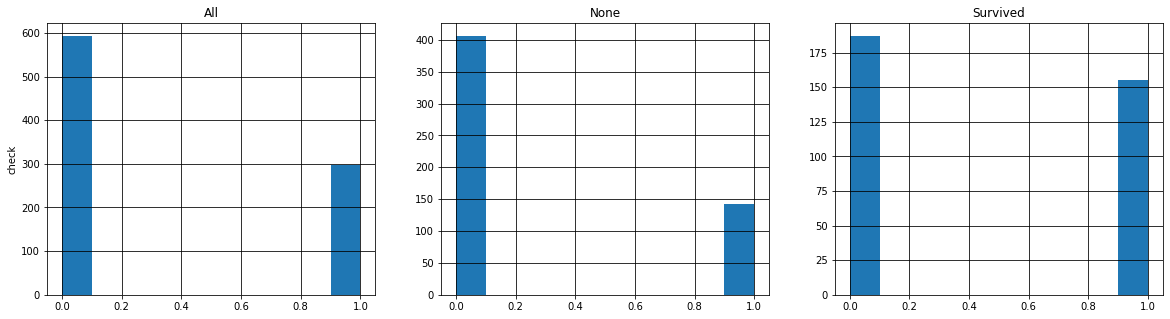

In [16]:
col = ['check']

train_df_Embarked_Pclass = train_df.copy()
train_df_Embarked_Pclass['check'] = 1
train_df_Embarked_Pclass.loc[(train_df_Embarked_Pclass['Embarked']=='C') | (train_df_Embarked_Pclass['Pclass']==3),'check'] = 0

d_x_cont = train_df_Embarked_Pclass[col].loc[train_df_Embarked_Pclass['Survived']==0,:].copy()
s_x_cont = train_df_Embarked_Pclass[col].loc[train_df_Embarked_Pclass['Survived']==1,:].copy()



col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df_Embarked_Pclass.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([s_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()


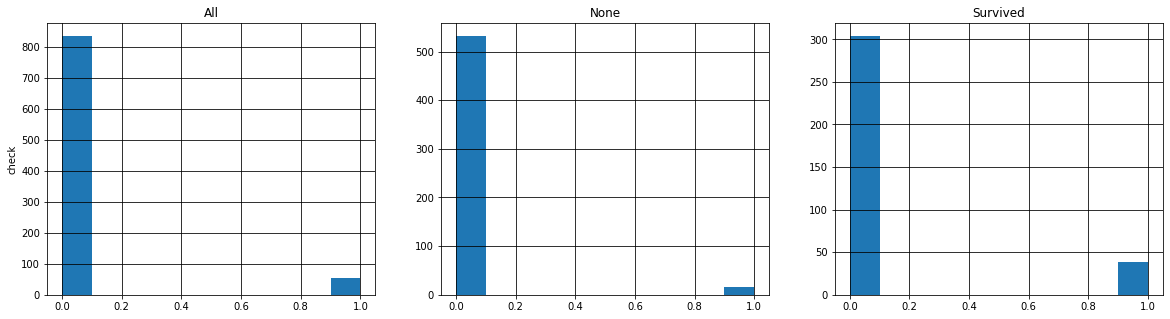

In [20]:
col = ['check']

train_df_Sex_Age = train_df.copy()
train_df_Sex_Age['check'] = 0
train_df_Sex_Age.loc[(train_df_Sex_Age['Sex']=='female') & (train_df_Sex_Age['Age']<18),'check'] = 1

d_x_cont = train_df_Sex_Age[col].loc[train_df_Sex_Age['Survived']==0,:].copy()
s_x_cont = train_df_Sex_Age[col].loc[train_df_Sex_Age['Survived']==1,:].copy()



col_val=3
row_val=1


i = 0
plt.figure(figsize=(20,5))
col = col[0]

plt.subplot(row_val, col_val, i + 1) 
plt.hist([train_df_Sex_Age.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('All')
plt.ylabel(col)
i += 1

plt.subplot(row_val, col_val, i + 1)  
plt.hist([d_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('None')
i += 1

plt.subplot(row_val,col_val, i + 1) 
plt.hist([s_x_cont.loc[:, col]])
plt.grid(which='major',color='black',linestyle='-')
plt.title('Survived')
i += 1

plt.show()


# Ageの欠損値をランダムフォレストで埋める
https://qiita.com/jun40vn/items/d8a1f71fae680589e05c

In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

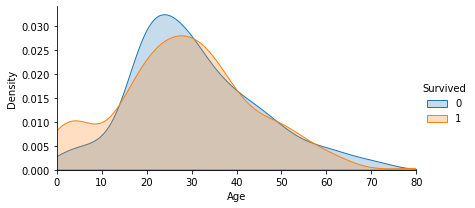

In [30]:
# 年齢別生存曲線と死亡曲線
facet = sns.FacetGrid(train_df[0:890], hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df.loc[0:890,'Age'].max()))
facet.add_legend()
plt.show()

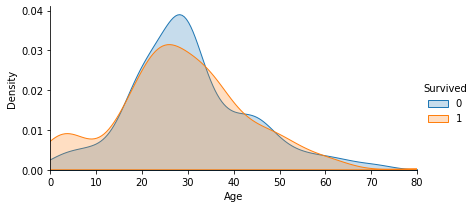

In [31]:
train_age_df = train_df.copy()

# ------------ Age ------------
# Age を Pclass, Sex, Parch, SibSp からランダムフォレストで推定
from sklearn.ensemble import RandomForestRegressor

# 推定に使用する項目を指定
age_df = train_age_df[['Age', 'Pclass','Sex','Parch','SibSp']]

# ラベル特徴量をワンホットエンコーディング
age_df=pd.get_dummies(age_df)

# 学習データとテストデータに分離し、numpyに変換
known_age = age_df[age_df.Age.notnull()].values  
unknown_age = age_df[age_df.Age.isnull()].values

# 学習データをX, yに分離
X = known_age[:, 1:]  
y = known_age[:, 0]

# ランダムフォレストで推定モデルを構築
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

# 推定モデルを使って、テストデータのAgeを予測し、補完
predictedAges = rfr.predict(unknown_age[:, 1::])
train_age_df.loc[(train_age_df.Age.isnull()), 'Age'] = predictedAges 

# 年齢別生存曲線と死亡曲線
facet = sns.FacetGrid(train_age_df[0:890], hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_age_df.loc[0:890,'Age'].max()))
facet.add_legend()
plt.show()

In [32]:
train_title_df = train_df.copy()
train_title_df['Title'] = train_title_df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])


In [35]:
train_title_df.groupby(['Title']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2,1,2
Don,1,1,1,1,1,1,1,1,1,1,0,1
Dr,7,7,7,7,7,6,7,7,7,7,3,7
Jonkheer,1,1,1,1,1,1,1,1,1,1,0,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,36,40,40,40,40,7,40
Miss,182,182,182,182,182,146,182,182,182,182,47,181


<AxesSubplot:xlabel='Title', ylabel='Survived'>

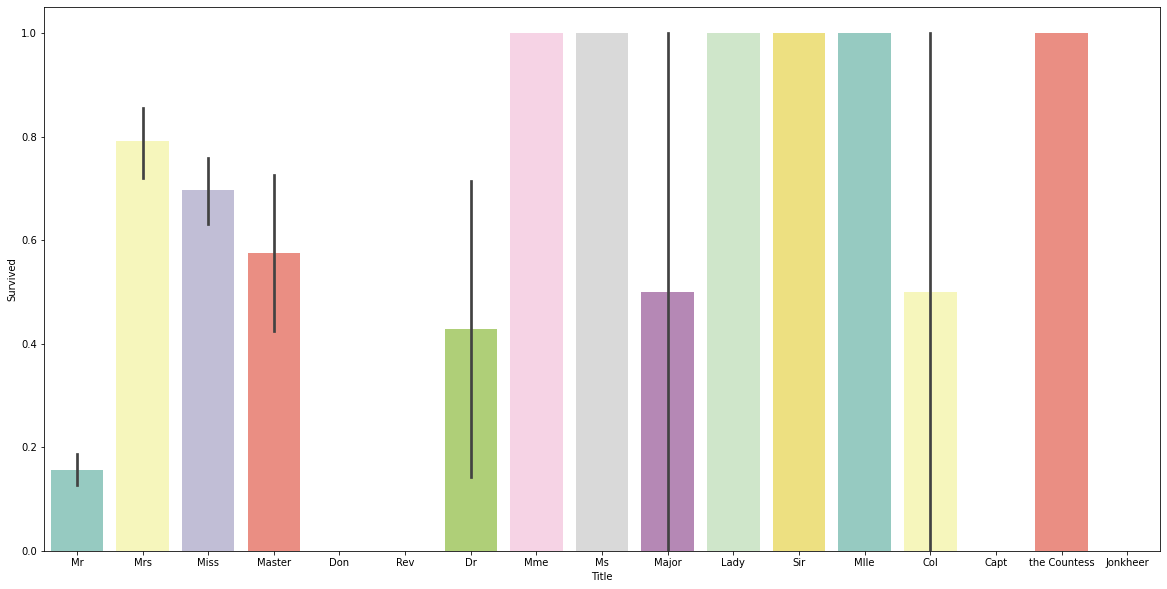

In [36]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Title', y='Survived', data=train_title_df, palette='Set3')


In [47]:
train_title_df['Title'].replace(['Don', 'Rev', 'Capt', 'Col', 'Don', 'Jonkheer', 'Sir', 'the Countess', 'Lady', 'Mme', 'Ms', 'Mlle', 'Major', 'Dr'], 'other', inplace=True)


<AxesSubplot:xlabel='Title', ylabel='Survived'>

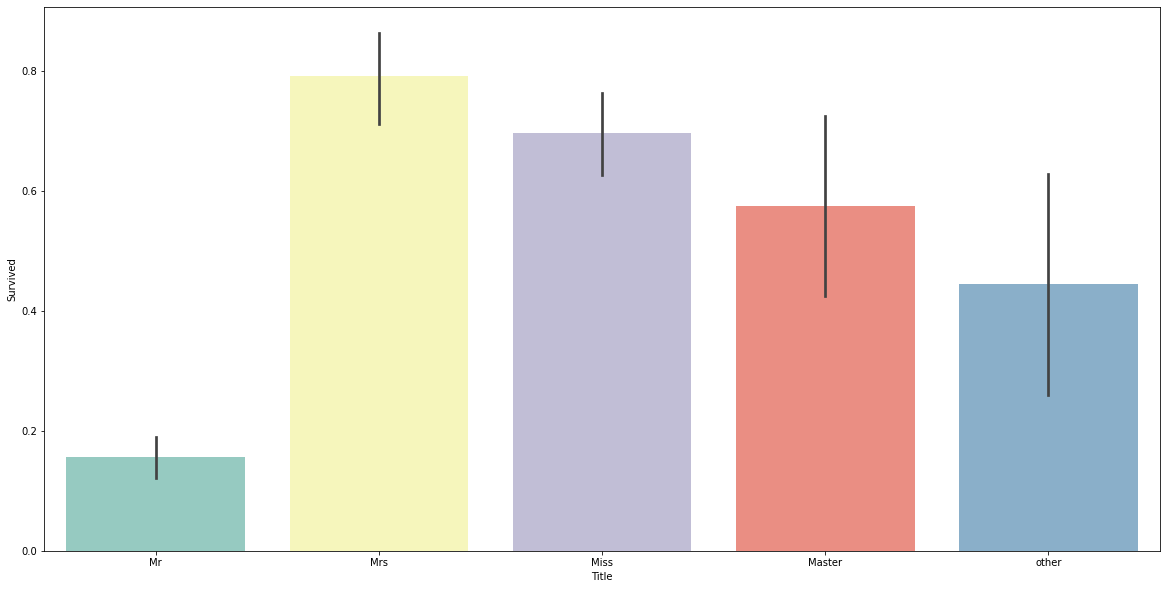

In [48]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Title', y='Survived', data=train_title_df, palette='Set3')


# 苗字を取り出す

In [6]:
train_df['Surname'] = train_df['Name'].map(lambda name:name.split(',')[0].strip())

In [7]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


## 同じSurname(苗字)の出現頻度をカウント(出現回数が2以上なら家族)

In [8]:
train_df['FamilyGroup'] = train_df['Surname'].map(train_df['Surname'].value_counts())

In [9]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilyGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,1


In [11]:
# 家族で16才以下または女性の生存率
Female_Child_Group=train_df.loc[(train_df['FamilyGroup']>=2) & ((train_df['Age']<=16) | (train_df['Sex']=='female'))]
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
print(Female_Child_Group.value_counts())

1.000000    77
0.000000    27
0.750000     2
0.500000     1
0.333333     1
0.142857     1
Name: Survived, dtype: int64


# チケットNoが同じ人でグループ

In [13]:
# ----------- Ticket ----------------
# 同一Ticketナンバーの人が何人いるかを特徴量として抽出
Ticket_Count = dict(train_df['Ticket'].value_counts())
train_df['TicketGroup'] = train_df['Ticket'].map(Ticket_Count)

In [14]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilyGroup,TicketGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,3,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,2,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,1,1


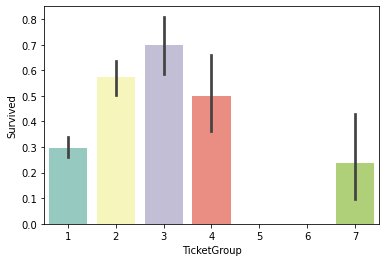

In [15]:
sns.barplot(x='TicketGroup', y='Survived', data=train_df, palette='Set3')
plt.show()


In [10]:
train_sex_df = train_df.copy()

train_sex_df.isnull().sum()
# train_sex_df.loc[(train_sex_df['Sex'] is None),:]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64